In [149]:
from utils.head import ensemble
from utils.dataset import load_compiled_data
from utils.training import train_aux, train_de
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchinfo
import pickle as pkl
import time
import os
import numpy as np

device = torch.device('cuda:0')

offset = [[19.75390625, 248.5, 9.0, 5.5], [5.056640625, 248.5, 10.109375, 4.5]]
divider = [[1895.24609375, 395.75, 175.25, 151.0],
           [1909.443359375, 396.5, 172.640625, 83.5]]

torch.backends.cudnn.benchmark = True
trajectory_threshold = [800, 700]

test_data = load_compiled_data(ts=[2,3,4], ws=[1], rs=[
                               3], offset=offset, divider=divider, trajectory_threshold=trajectory_threshold, inference_mode = True, device=device, verbose=False)
test_data['y'] = test_data['y']
ff = torch.any(torch.all(test_data['x'] != 0, dim = 2), dim = 0)
ff_all = torch.all(torch.all(test_data['x'] != 0, dim = 2), dim = 0)

In [150]:
model_list = ['s_s', 's_m', 's_l', 'm_s', 'm_m', 'm_l', 'l_s', 'l_m', 'l_l']
seed_list = [0,1,2,3,4]
init_list = ['kaiming']
desc = 'big_dataset'

In [152]:
# Time dict Creation
for init in init_list:
    if os.path.exists(f'output/distance_estimator/{init}_{desc}_as.pkl'):
        with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'rb') as f:
            output_dict, time_dict = pkl.load(f)
    else:
        output_dict, time_dict = {}, {}
        
    time_dict = {i:torch.zeros(len(seed_list)) for i in model_list}
    with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'wb') as f:
        pkl.dump([output_dict, time_dict], f)
            
    for model_type in model_list:
        seed = 0
        print(f"Inferencing Model {model_type}, Seed {seed}, {init} Initialization")
        model = ensemble(f'models/config/model_{model_type}.yaml', model_state_dict=f'models/head/{desc}/{init}_{seed}/{model_type}.pt', device=device)

        with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'rb') as f:
            output_dict, time_dict = pkl.load(f)

        x_test = torch.ones([2,1,4], device = device)
        for i in range(0, 500):
            model(x_test, batch_mode = False)

        t0=time.time()
        for i in range(0, 100):
            __ = model(x_test, batch_mode = False)
        time_dict[model_type] = (time.time() - t0) / 100
        

        with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'wb') as f:
            pkl.dump([output_dict, time_dict], f)


Inferencing Model s_s, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model s_m, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model s_l, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model m_s, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model m_m, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model m_l, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model l_s, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model l_m, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded
Inferencing Model l_l, Seed 0, kaiming Initialization
Input_Reg Aux DE Loaded


In [8]:
for init in init_list:
    if os.path.exists(f'output/distance_estimator/{init}_{desc}_as.pkl'):
        with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'rb') as f:
            output_dict, time_dict = pkl.load(f)
    else:
        output_dict, time_dict = {}, {}
        
    output_dict = {i:torch.zeros(len(seed_list), test_data['x'][:, ff].shape[1]) for i in model_list}
    
    with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'wb') as f:
        pkl.dump([output_dict, time_dict], f)
            
    for model_type in model_list:
        for seed in seed_list:
            print(f"Inferencing Model {model_type}, Seed {seed}, {init} Initialization")
            model = ensemble(f'models/config/model_{model_type}.yaml', model_state_dict=f'models/head/{desc}/{init}_{seed}/{model_type}.pt', device=device)
            
            with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'rb') as f:
                output_dict, time_dict = pkl.load(f)

            output_dict[model_type][seed] = model(test_data['x'][:, ff]).cpu()

            with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'wb') as f:
                pkl.dump([output_dict, time_dict], f)

Inferencing Model s_s, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_s, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_s, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_s, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_s, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_m, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_m, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_m, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_m, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_m, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_l, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_l, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_l, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_l, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model s_l, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_s, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_s, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_s, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_s, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_s, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_m, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_m, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_m, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_m, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_m, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_l, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_l, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_l, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_l, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model m_l, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_s, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_s, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_s, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_s, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_s, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_m, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_m, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_m, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_m, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_m, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_l, Seed 0, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_l, Seed 1, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_l, Seed 2, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_l, Seed 3, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

Inferencing Model l_l, Seed 4, kaiming Initialization
Input Reg Loaded Aux Loaded DE Loaded 


  0%|          | 0/17104 [00:00<?, ?it/s]

In [115]:
init = init_list[0]
with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'rb') as f:
    output_dict, time_dict = pkl.load(f)
best_mape = {}
for i in output_dict.keys():
    best_mape[i] = torch.mean(torch.mean(abs(output_dict[i].cuda() - test_data['y'][0, ff, 0]) * 100 / test_data['y'][0, ff, 0], axis = 1)).item()
output_s = [best_mape[i] for i in ['s_s', 's_m', 's_l']]
output_m = [best_mape[i] for i in ['m_s', 'm_m', 'm_l']]
output_l = [best_mape[i] for i in ['l_s', 'l_m', 'l_l']]
time_s = [time_dict[model_type] * 1000 for model_type in ['s_s', 's_m', 's_l']]
time_m = [time_dict[model_type] * 1000 for model_type in ['m_s', 'm_m', 'm_l']]
time_l = [time_dict[model_type] * 1000 for model_type in ['l_s', 'l_m', 'l_l']]

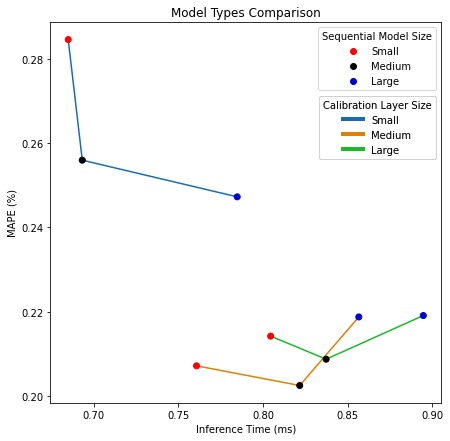

In [134]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1,1, figsize = (7, 7))
cmap1 = plt.cm.flag
cmap2 = plt.cm.viridis
ax.scatter(time_s, output_s, c=[0,1,2], vmin=0, vmax=20, cmap = 'flag', zorder = 2)
ax.scatter(time_m, output_m, c=[0,1,2], vmin=0, vmax=20, cmap = 'flag', zorder = 2)
ax.scatter(time_l, output_l, c=[0,1,2], vmin=0, vmax=20, cmap = 'flag', zorder = 2)

ax.set_title("Model Types Comparison")
ax.set_ylabel('MAPE (%)')
ax.set_xlabel('Inference Time (ms)')

ax.plot(time_s, output_s, zorder = 1, c='#156DB6')
ax.plot(time_m, output_m, zorder = 1, c='#DF8000')
ax.plot(time_l, output_l, zorder = 1, c='#17BB24')


custom_lines_1 = [Line2D([0], [0], color=cmap1(0), lw=0, marker='o', markersize=6),
                Line2D([0], [0], color=cmap1(1000), lw=0, marker='o', markersize=6),
                Line2D([0], [0], color=cmap1(9), lw=0, marker='o', markersize=6)]

custom_lines_2 = [Line2D([0], [0], color='#156DB6', lw = 4),
                Line2D([0], [0], color='#DF8000', lw = 4),
                Line2D([0], [0], color='#17BB24', lw = 4)]


legend1 = ax.legend(custom_lines_1, ['Small', 'Medium', 'Large'], title= "Sequential Model Size", loc ='upper right')
ax.add_artist(legend1)
legend2 = ax.legend(custom_lines_2, ['Small', 'Medium', 'Large'], title="Calibration Layer Size", loc = 'upper center', bbox_to_anchor=[0.837, 0.82])
ax.add_artist(legend2)

Text(0.5, 0, 'Airplane Distance (nm)')

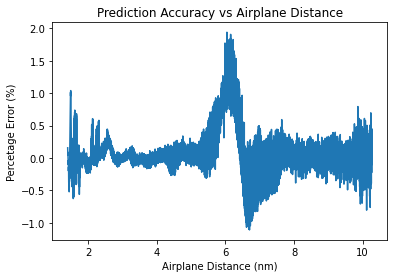

In [96]:
with open(f'output/distance_estimator/{init}_{desc}_as.pkl', 'rb') as f:
    output_dict, time_dict = pkl.load(f)
    
fig, ax = plt.subplots(1,1)
ss = np.argsort(test_data['y'][0, ff, 0].cpu().numpy())

gt = test_data['y'][0, ff, 0].cpu().numpy()[ss]
pred = output_dict['m_m'][3][ss]
error = ((pred - gt) / gt) * 100

ax.plot(gt * 10, error)
ax.set_title("Prediction Accuracy vs Airplane Distance")
ax.set_ylabel("Percetage Error (%)")
ax.set_xlabel("Airplane Distance (nm)")

In [136]:
import torchinfo
model = ensemble(f'models/config/model_{model_list[8]}.yaml', device=device, num_camera=2)
torchinfo.summary(model, input_size=(1,1,4))

  0%|          | 0/1 [00:00<?, ?it/s]

Layer (type:depth-idx)                   Output Shape              Param #
ensemble                                 [1]                       131,585
├─ModuleList: 1-1                        --                        198,656
│    └─Sequential: 2-1                   [1, 512]                  --
│    │    └─Linear: 3-1                  [1, 256]                  1,280
│    │    └─LeakyReLU: 3-2               [1, 256]                  --
│    │    └─Linear: 3-3                  [1, 256]                  65,792
│    │    └─LeakyReLU: 3-4               [1, 256]                  --
│    │    └─Linear: 3-5                  [1, 512]                  131,584
│    │    └─LeakyReLU: 3-6               [1, 512]                  --
├─Sequential: 1-2                        [1, 1]                    --
│    └─LSTM: 2-2                         [1, 1, 1024]              23,093,248
│    └─extract_tensor: 2-3               [1, 1024]                 --
│    └─Linear: 2-4                       [1, 512]      